# HR Analytics Project- Understanding the Attrition in HR

# Project Description

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

# HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

# Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

# Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Dataset Link

•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/HR%20Analytics/ibm-hr-analytics-employee-attrition-performance.zip

# Import the needed libraries for data preprocessing, model building and evaluation

In [91]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import GridSearchCV, cross_val_score,RandomizedSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,QuantileTransformer,PowerTransformer,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import FactorAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier
from scipy.stats import zscore,boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import FactorAnalysis
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,precision_score,auc,roc_curve,RocCurveDisplay,r2_score,roc_auc_score
from imblearn.over_sampling import SMOTE

# Load the dataset and read first five records from the dataset

In [94]:
hrdf=pd.read_csv(r'C:\Users\KIRUTHIKA\OneDrive\Documents\PG Program in Data Science Machine Learning and Neural Network\Internship\Datasets\WA_Fn-UseC_-HR-Employee-Attrition.csv')
hrdf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Get the information about the dataset using pandas info() method

In [97]:
hrdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

The above result shows that there are no null records present in the dataset

In [100]:
hrdf.shape

(1470, 35)

The shape of the dataset shows that there are 1470 rows and 35 columns in the dataset

# Check for the null records present in the dataset

In [104]:
hrdf.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

The isnull() method in pandas shows that there are no null records present in the dataset

# Check for the duplicate records present in the dataset

In [108]:
hrdf.duplicated().sum()

0

The above result shows that there are no duplicate records present in the dataset

# Statistical summary of the dataset can be seen using describe method in pandas

In [112]:
hrdf.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


The observation from the above statistical summary shows that:

1, The count values for all the columns are same and there are no null records present in the dataset.

2, The values between 75th percentile and maximum is not vary much and there are no outliers present in the dataset.

3, There is less amount of skewness present in the dataset.

In [115]:
hrdf['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

# plot shows the relationship between Age and Attrition columns for the BusinessTravel using seaborn stripplot

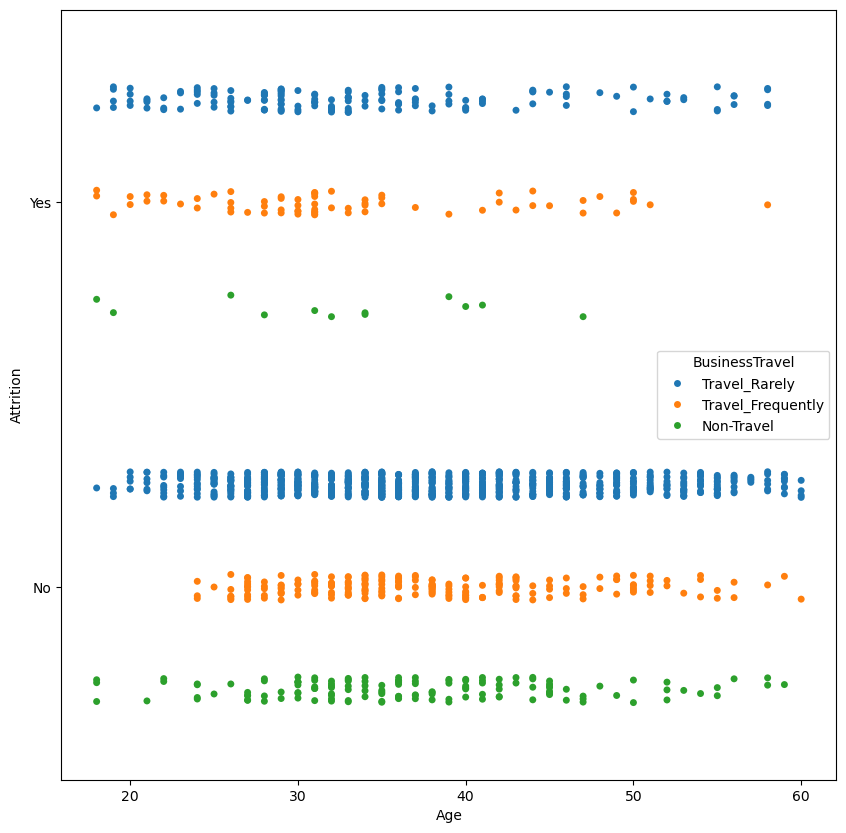

In [118]:
plt.figure(figsize=(10,10))
sns.stripplot(hrdf,x='Age',y='Attrition',hue='BusinessTravel',dodge=True)
plt.show()

The above plot shows that the Attrition for the business travel (Travel_rarely) is high for the senior citizen (age of 60 years) and Attrition for the Business travel (Non travel) is low for the age upto 50 years.

# plot shows the relationship between Age and Attrition columns for each Department using seaborn stripplot

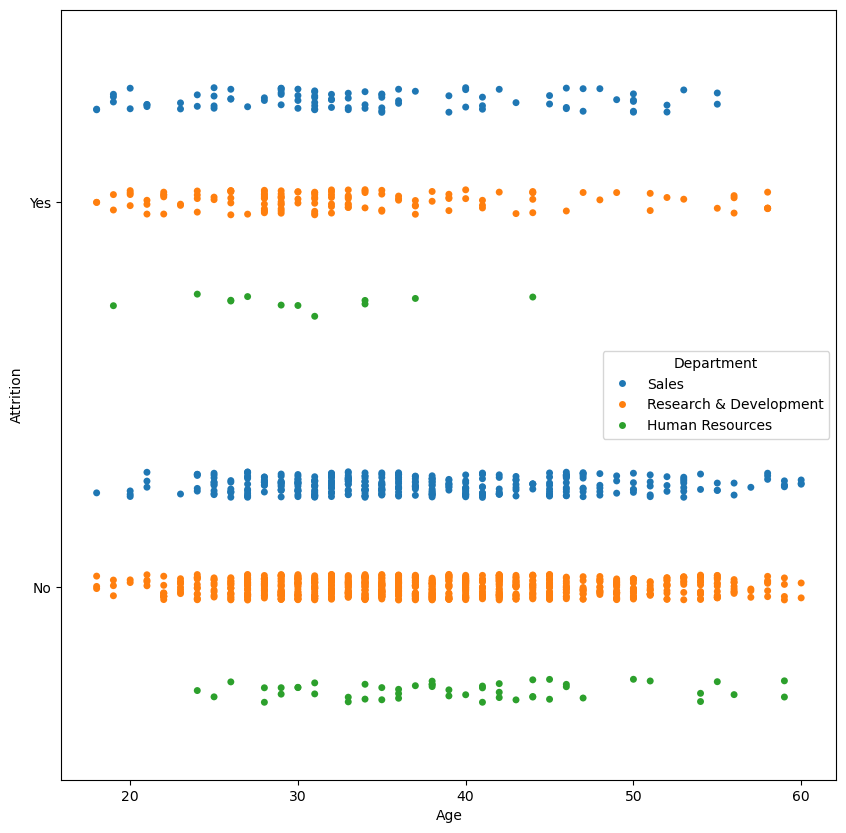

In [122]:
plt.figure(figsize=(10,10))
sns.stripplot(hrdf,x='Age',y='Attrition',hue='Department',dodge=True)
plt.show()

The above plot shows that the Attrition is more for the people at the age of 60 for reasearch and development department and the Attrition is less for the Human Resource department for the people with the age upto 45 years.

# plot shows the realtionship between the Age and Attrition columns for each EducationField using seaborn stripplot

<Figure size 1000x1000 with 0 Axes>

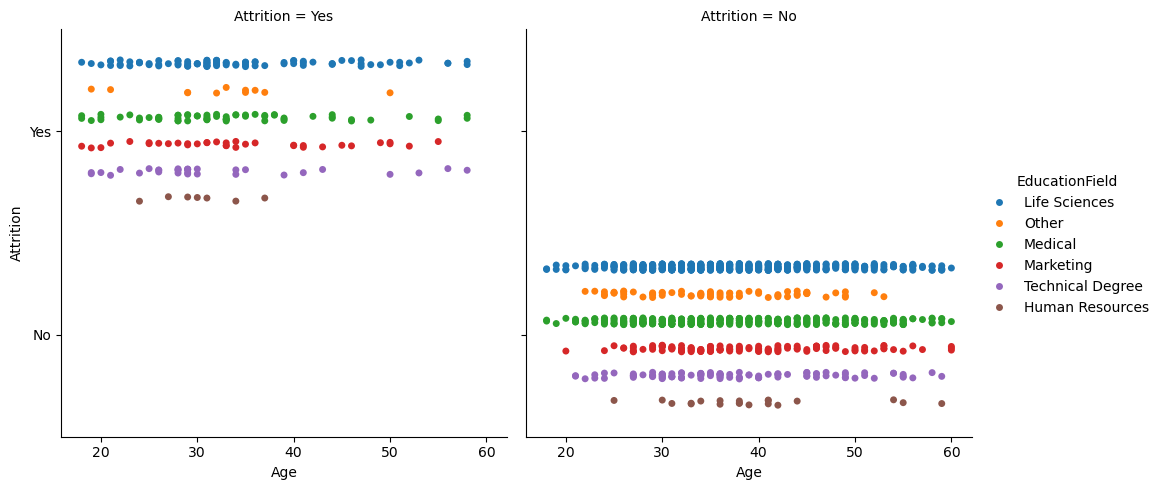

In [126]:
plt.figure(figsize=(10,10))
sns.catplot(hrdf,x='Age',y='Attrition',hue='EducationField',col='Attrition',dodge=True)
plt.show()

# Categorical plot shows the relationship between Age and Attrition for Gender column

<Figure size 2000x2000 with 0 Axes>

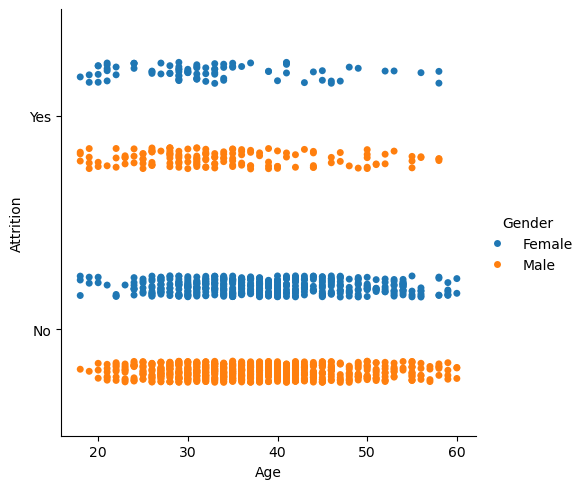

In [129]:
plt.figure(figsize=(20,20))
sns.catplot(hrdf,x='Age',y='Attrition',hue='Gender',dodge=True)
plt.show()

# Categorical plot shows the relationship between Age and Attrition for the JobRole and Gender

<Figure size 1000x1000 with 0 Axes>

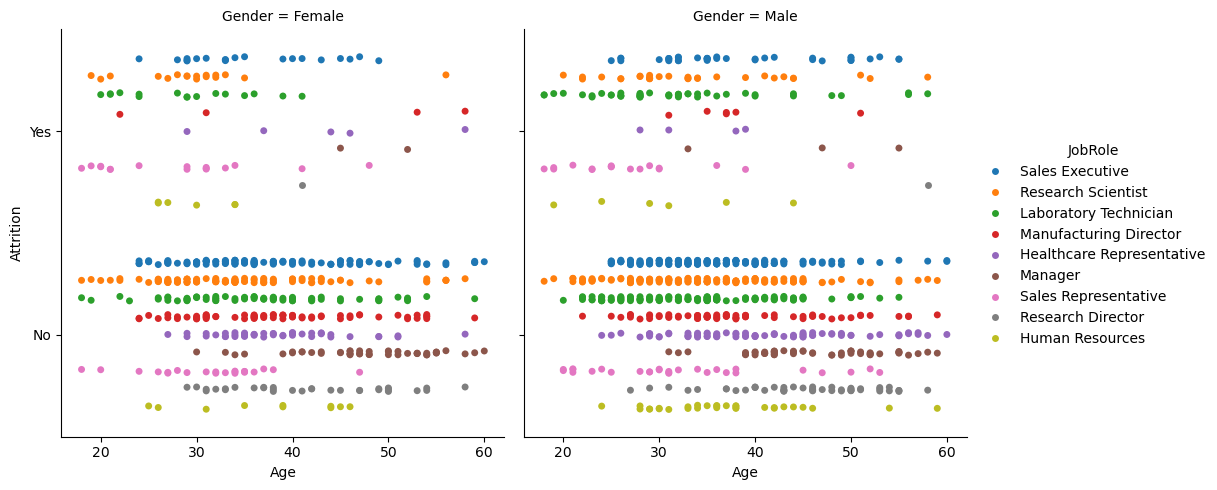

In [132]:
plt.figure(figsize=(10,10))
sns.catplot(hrdf,x='Age',y='Attrition',hue='JobRole',col='Gender',dodge=True)
plt.show()

# Categorical plot shows the relationship between Age and Attrition for the Marital status and Gender

<Figure size 1000x1000 with 0 Axes>

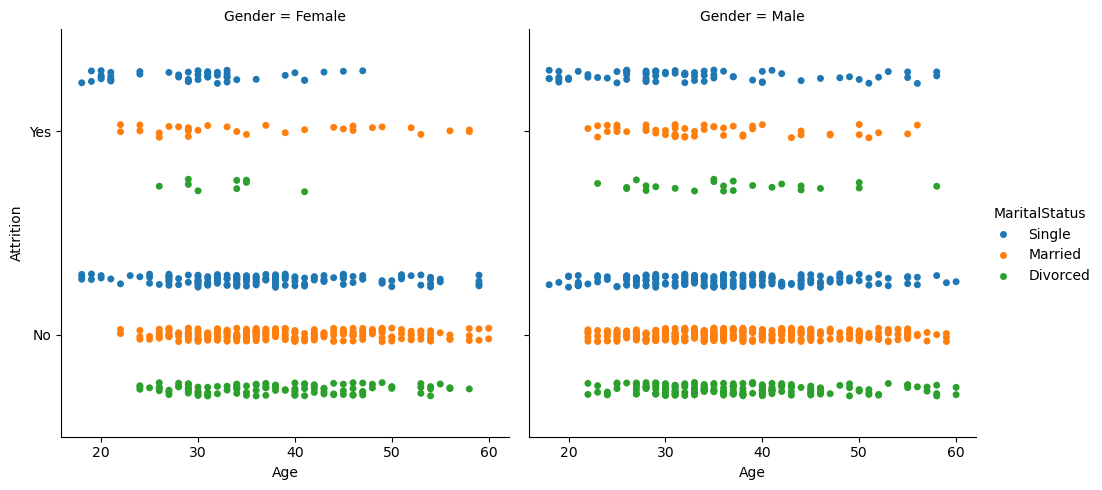

In [135]:
plt.figure(figsize=(10,10))
sns.catplot(hrdf,x='Age',y='Attrition',hue='MaritalStatus',col='Gender',dodge=True)
plt.show()

# Categorical plot shows the relationship between Age and Attrition for the Overtime work and Gender

<Figure size 1000x1000 with 0 Axes>

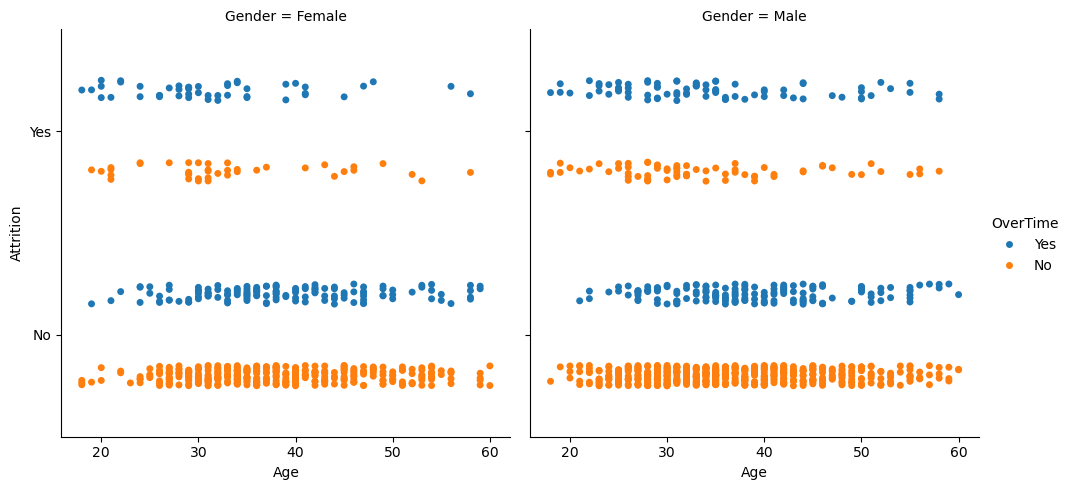

In [138]:
plt.figure(figsize=(10,10))
sns.catplot(hrdf,x='Age',y='Attrition',hue='OverTime',col='Gender',dodge=True)
plt.show()

# Categorical plot shows the relationship between MonthlyIncome and Attrition for overtime and Gender column

<Figure size 1000x1000 with 0 Axes>

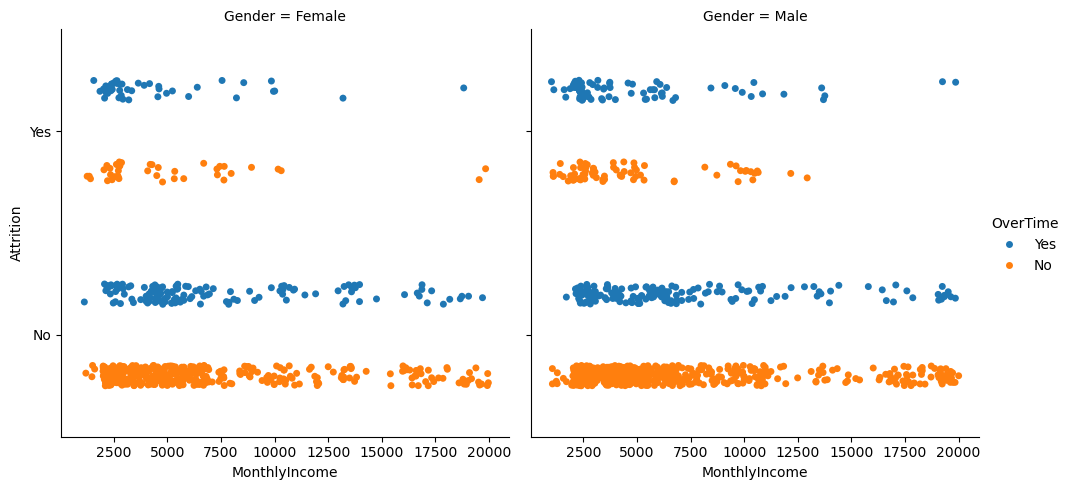

In [141]:
plt.figure(figsize=(10,10))
sns.catplot(hrdf,x='MonthlyIncome',y='Attrition',hue='OverTime',col='Gender',dodge=True)
plt.show()

# Countplot shows the relationship between YearsAtCompany and Attrition

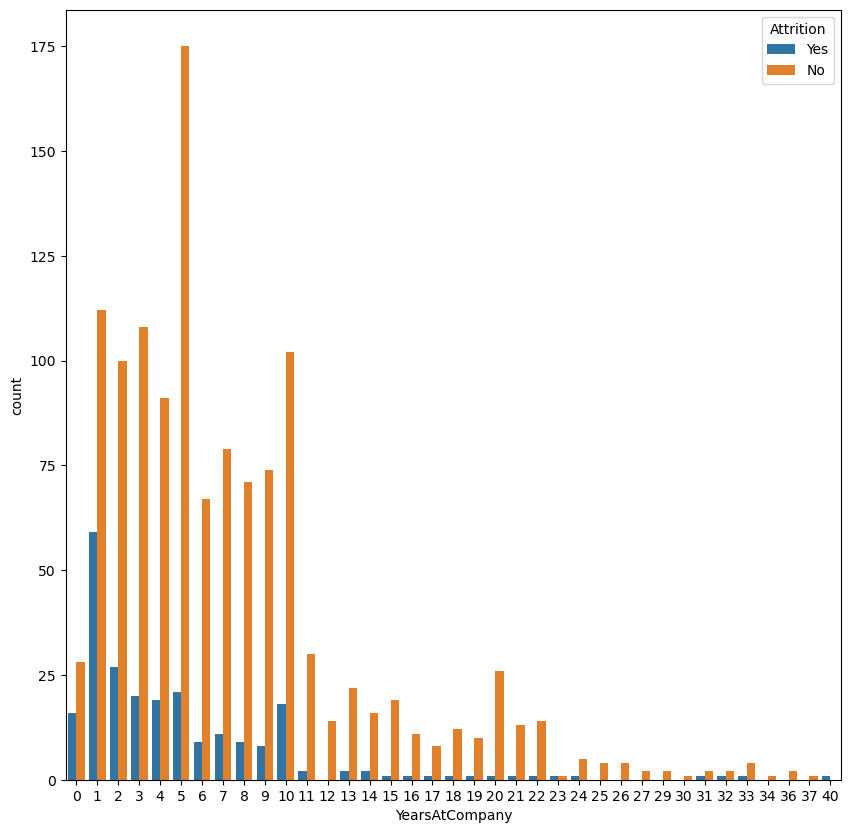

In [144]:
plt.figure(figsize=(10,10))
sns.countplot(hrdf,x='YearsAtCompany',hue='Attrition',dodge=True)
plt.show()

The above plot shows that the people who are working for 1 years in the company have higher attrition count and the people who are working for 5 years continuously in the company have no Attrition.

# Countplot shows the relationship between YearsInCurrentRole and Attrition

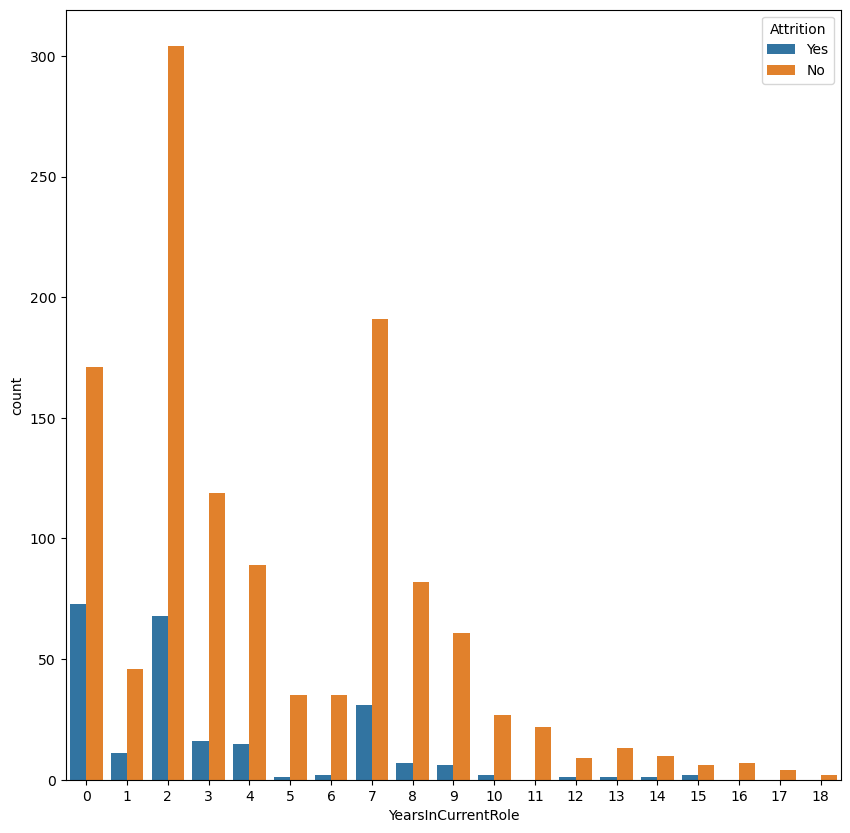

In [148]:
plt.figure(figsize=(10,10))
sns.countplot(hrdf,x='YearsInCurrentRole',hue='Attrition',dodge=True)
plt.show()

The above plot shows that people who are working in the current role for 0 to 2 years in the company have low Attrition count and the people who are not completed a year in the company have high Attrition count.

# Countplot shows the relationship between YearsSinceLastPromotion and Attrition

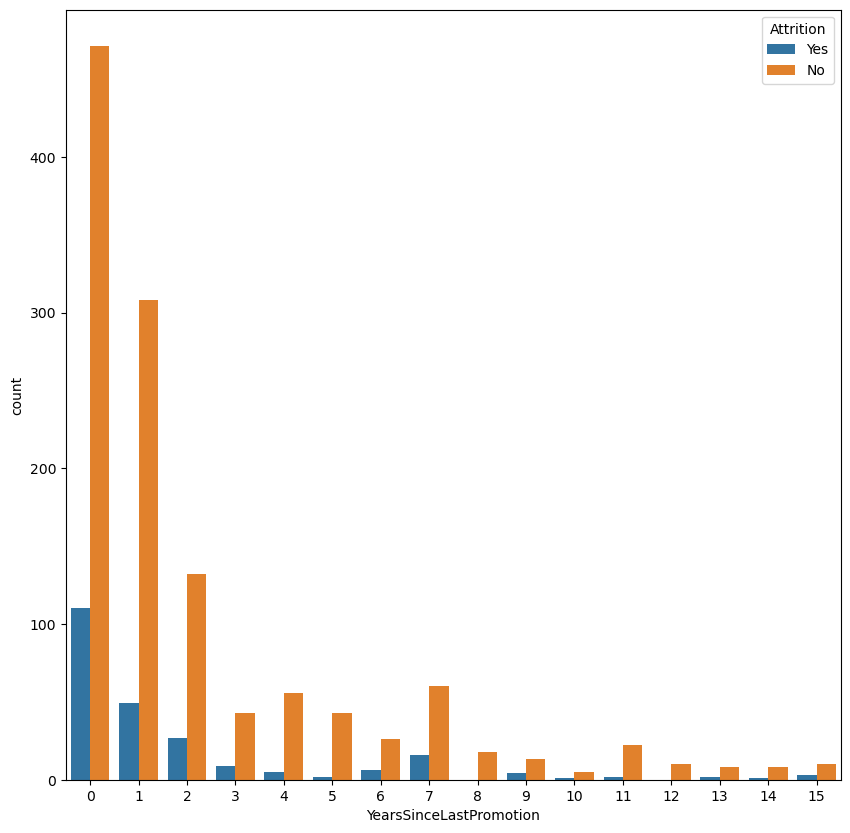

In [152]:
plt.figure(figsize=(10,10))
sns.countplot(hrdf,x='YearsSinceLastPromotion',hue='Attrition',dodge=True)
plt.show()

# Countplot shows the relationship between YearsWithCurrManager and Attrition

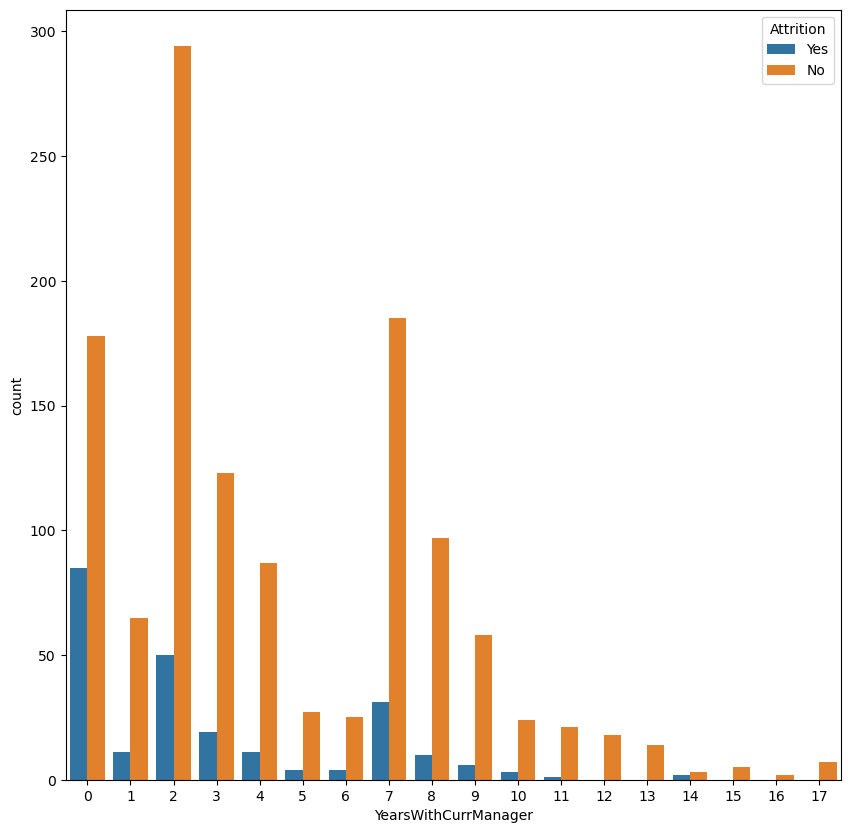

In [155]:
plt.figure(figsize=(10,10))
sns.countplot(hrdf,x='YearsWithCurrManager',hue='Attrition',dodge=True)
plt.show()

The above plot shows that the people who are working with the current manager for 2 years have no Attrition count.

# Countplot shows the relationship between PerformanceRating and Attrition

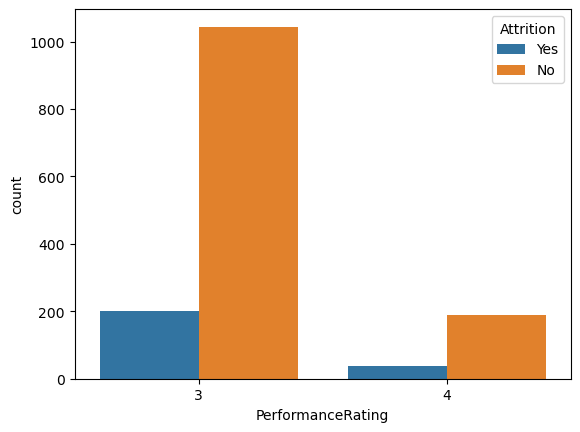

In [159]:
sns.countplot(hrdf,x='PerformanceRating',hue='Attrition',dodge=True)
plt.show()

The above plot shows that the people with the performance rating 3 have no Attrition 

# Label Encode the categorical columns

In [163]:
columns=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']

In [165]:
le=LabelEncoder()
hrdf[columns]=hrdf[columns].apply(le.fit_transform)
hrdf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [167]:
hrdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

The info() method shows that all column types are changed to numerical datatypes (int64,int32)

In [170]:
hrdf=hrdf.drop(columns=['Education','EmployeeNumber','JobInvolvement','EmployeeCount','Over18','StockOptionLevel','StandardHours'],axis=1)
hrdf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,1,2,0,94,...,11,3,1,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,3,1,61,...,23,4,4,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,4,4,1,92,...,15,3,2,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,1,4,0,56,...,11,3,3,8,3,3,8,7,3,0
4,27,0,2,591,1,2,3,1,1,40,...,12,3,4,6,3,3,2,2,2,2


# Heatmap shows the correlation between different features in the dataset

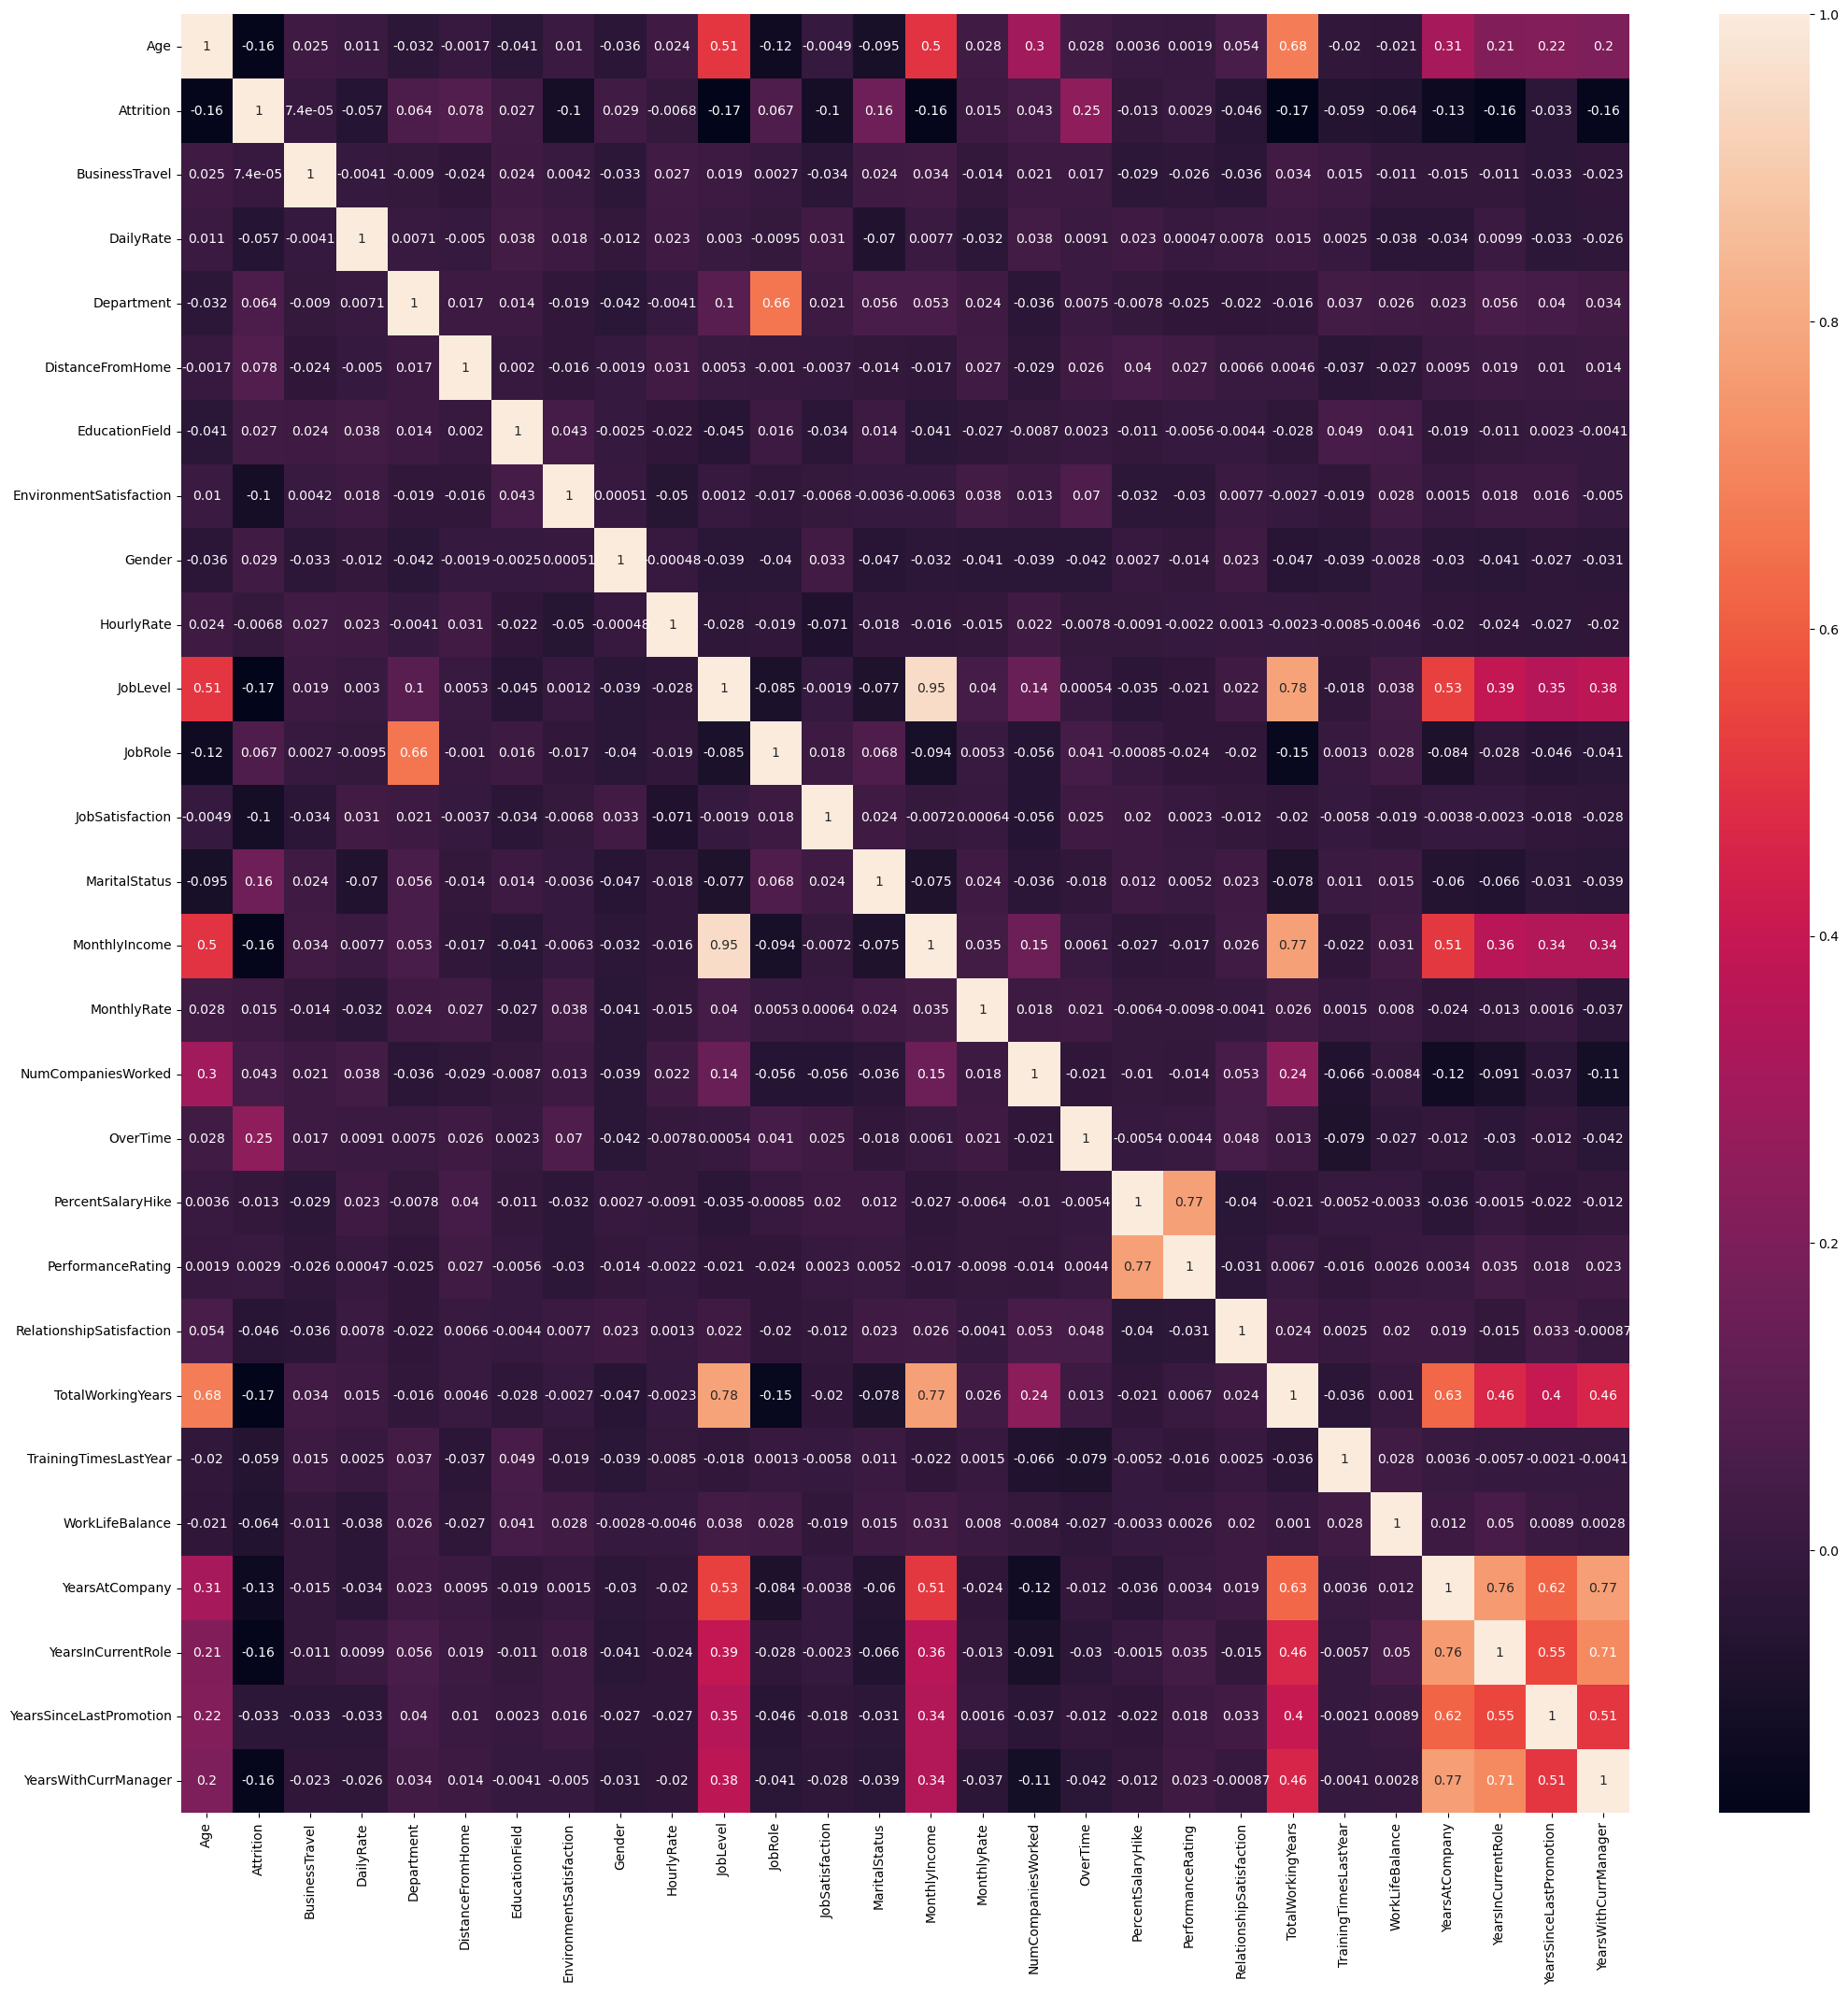

In [173]:
plt.figure(figsize=(25,25))
sns.heatmap(data=hrdf.corr(),annot=True)
plt.show()

The observation from the heatmap are:

1, The columns PercentSalaryHike and PerformanceRating are positively correlated with each other.

2, The columns YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager are positively correlated with each others.

In [176]:
hrdf.shape

(1470, 28)

# Countplot to show the relationship between the PercentSalaryHike and PerformanceRating

<Axes: xlabel='PerformanceRating', ylabel='count'>

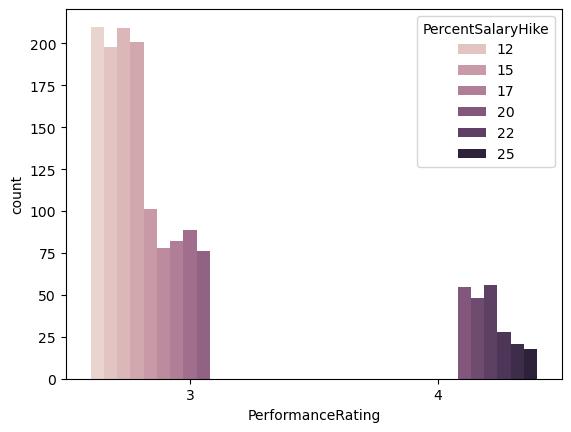

In [179]:
sns.countplot(hrdf,x='PerformanceRating',hue='PercentSalaryHike',dodge=True)

It is clear from the above plot that the perfomanceRating of 4 have higher PercentSalaryHike from 20 to 25 percent salary Hike and PerformanceRating of 3 have percentSalaryHike between 12 to 17 and have more count of employees in the company.

# Check for the skewness in the dataset using distplot

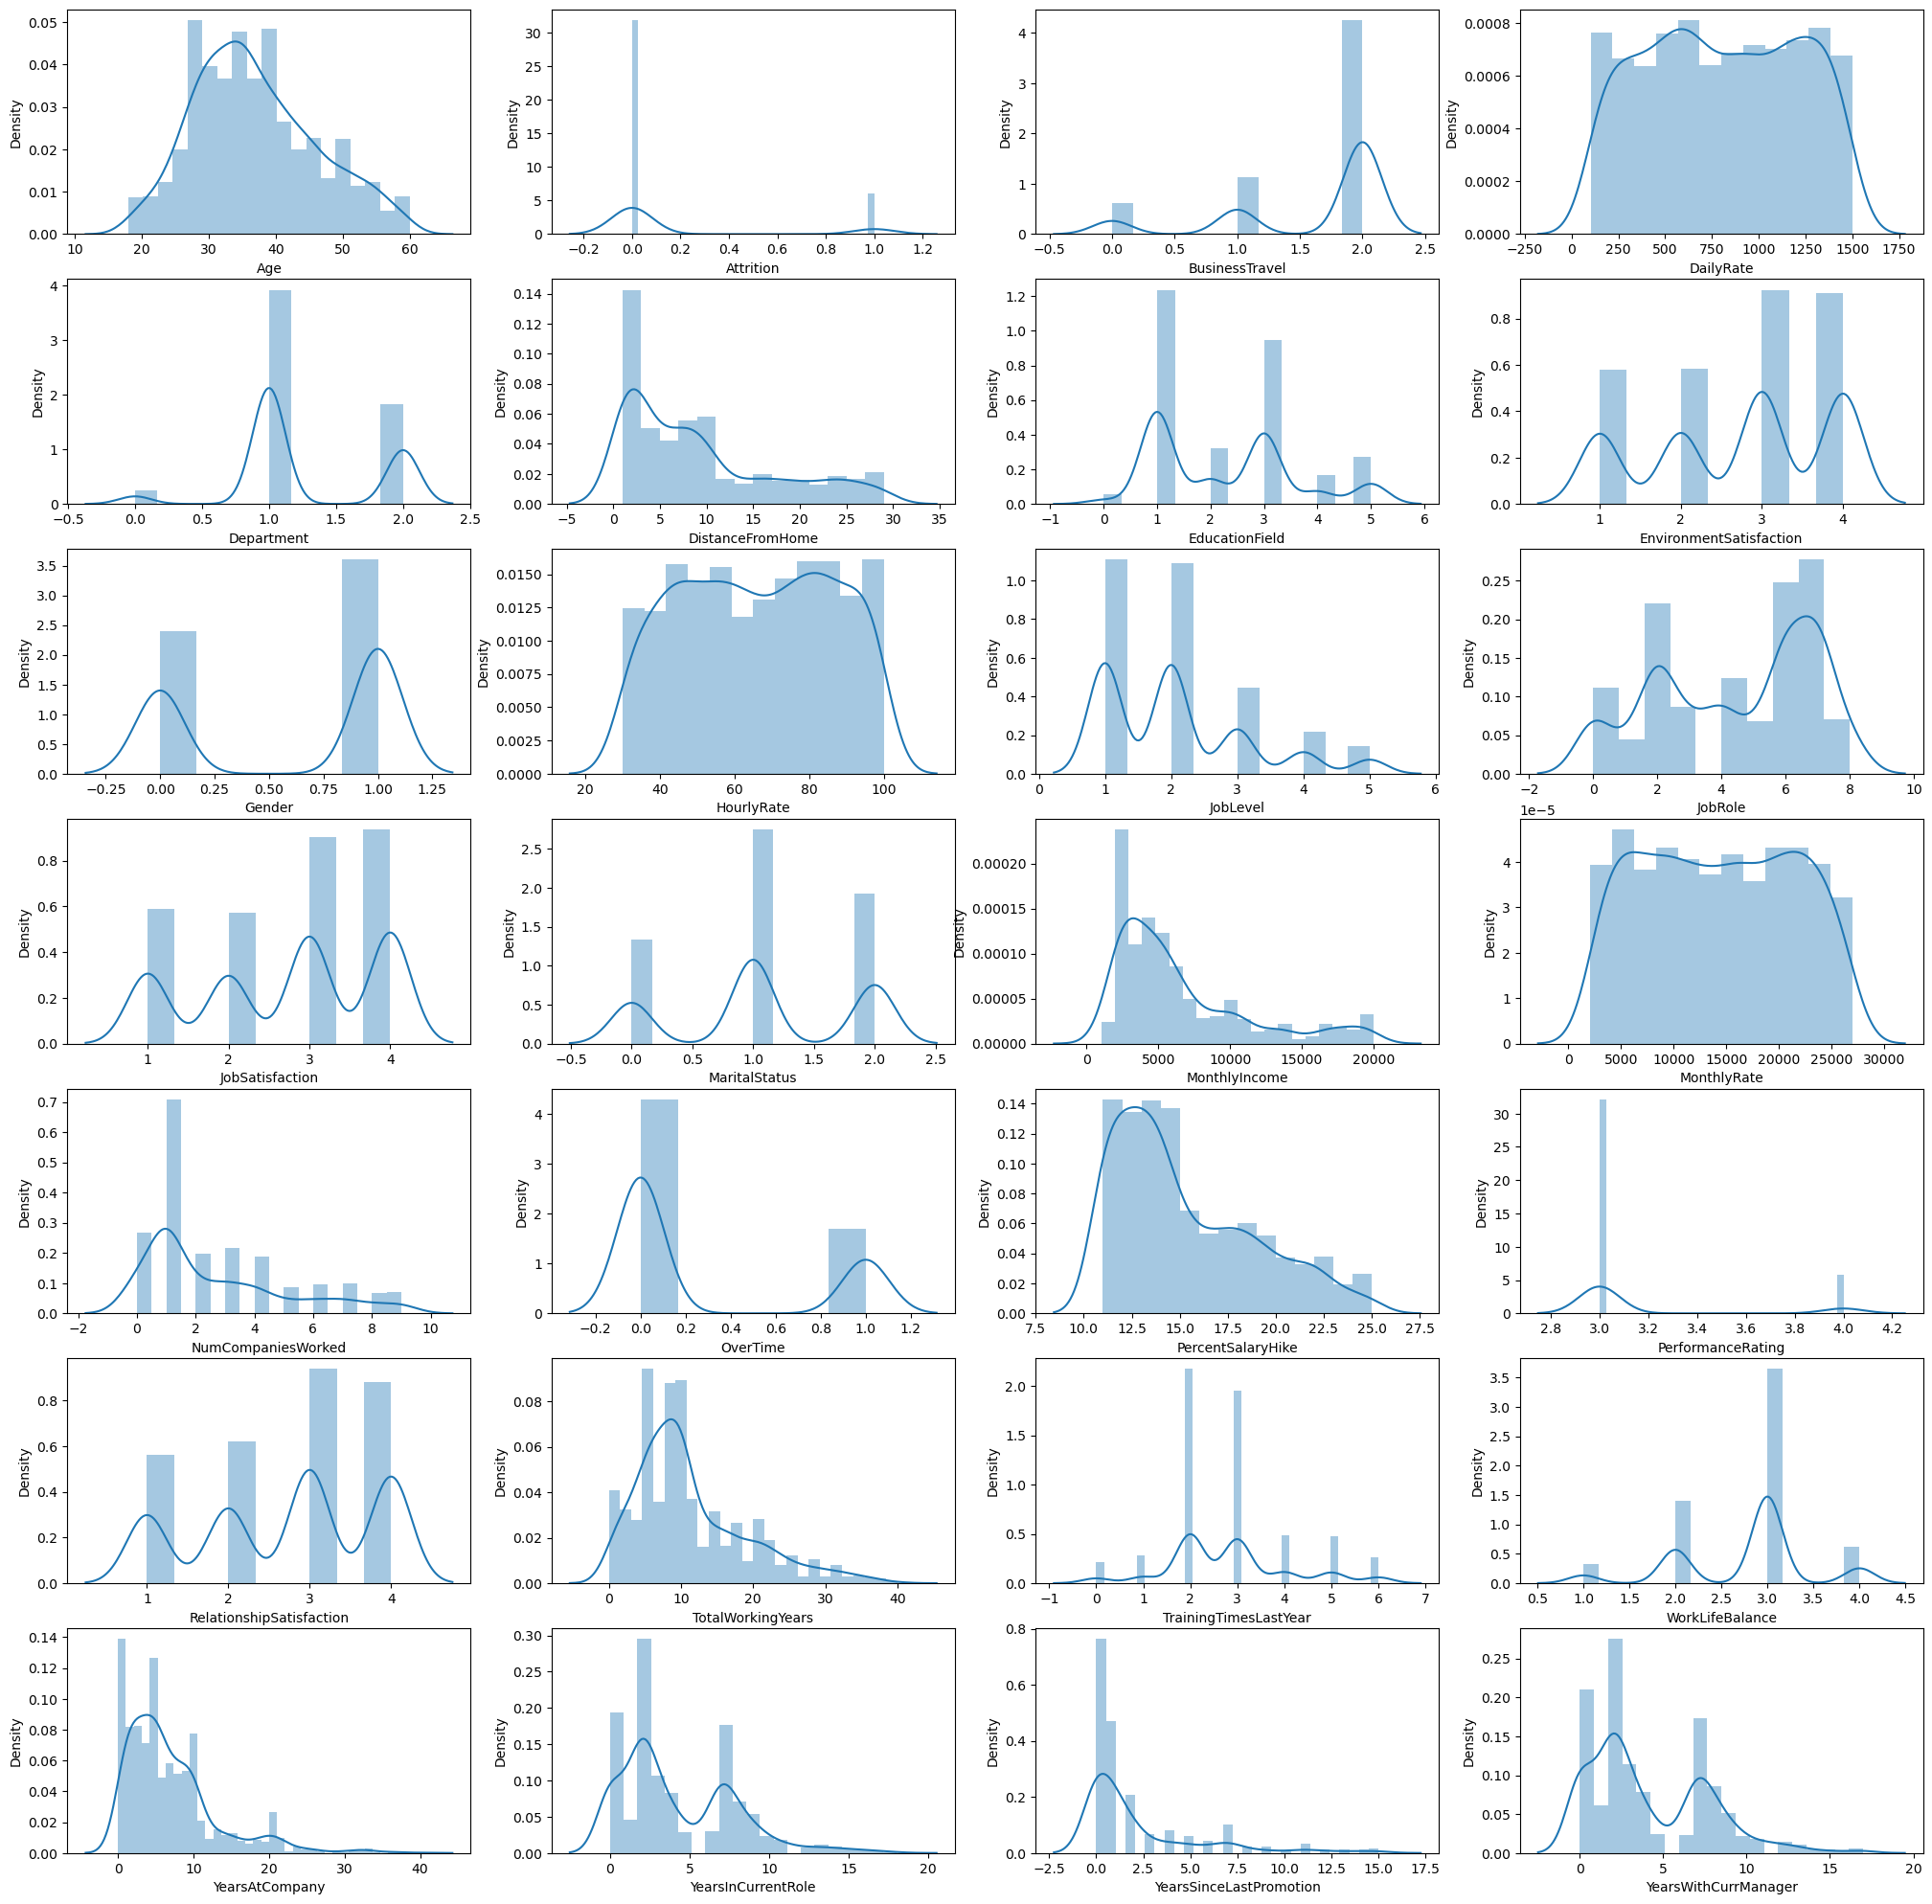

In [183]:
plt.figure(figsize=(25,25))
p=1
for i in hrdf:
    if p<=28:
        plt.subplot(7,4,p)
        sns.distplot(hrdf[i])
    p=p+1
plt.show()

# check for the skewness in the dataset using skew() method

In [186]:
hrdf.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
Y

# Remove the skewness using PowerTransformer

In [189]:
hr_attrdf=hrdf.drop(columns=['BusinessTravel','DistanceFromHome','JobLevel','MonthlyIncome','NumCompaniesWorked','OverTime','PercentSalaryHike','PerformanceRating','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'],axis=1)
hr_attrdf.head()

,Age,Attrition,DailyRate,Department,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,RelationshipSatisfaction,TrainingTimesLastYear,WorkLifeBalance
0,41,1,1102,2,1,2,0,94,7,4,2,19479,1,0,1
1,49,0,279,1,1,3,1,61,6,2,1,24907,4,3,3
2,37,1,1373,1,4,4,1,92,2,3,2,2396,2,3,3
3,33,0,1392,1,1,4,0,56,6,3,1,23159,3,3,3
4,27,0,591,1,3,1,1,40,2,2,1,16632,4,3,3


In [191]:
cols=['BusinessTravel','DistanceFromHome','JobLevel','MonthlyIncome','NumCompaniesWorked','OverTime','PercentSalaryHike','PerformanceRating','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
pt=PowerTransformer()
hrdftrans=pt.fit_transform(hrdf[cols])
hrdf_trans=pd.DataFrame(hrdftrans,columns=hrdf[cols].columns)
hrdf_trans.head()

,BusinessTravel,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.635468,-1.494085,0.241622,0.285965,1.621331,1.591746,-1.488918,-7.632783e-17,-0.244305,0.139692,0.205562,-1.094862,0.490147
1,-1.392865,0.243416,0.241622,0.052833,-0.571302,-0.628241,1.679689,4.232725e-16,0.052495,0.762660,0.883888,0.096854,0.909635
2,0.635468,-1.031215,-1.170135,-1.447625,1.271339,1.591746,0.201133,-7.632783e-17,-0.410500,-2.229592,-1.596434,-1.094862,-1.550156
3,-1.392865,-0.700347,-1.170135,-0.863050,-0.571302,1.591746,-1.488918,-7.632783e-17,-0.244305,0.482432,0.883888,0.905592,-1.550156
4,0.635468,-1.031215,-1.170135,-0.567909,1.766182,-0.628241,-0.948760,-7.632783e-17,-0.592063,-0.951540,-0.446645,0.607464,-0.406881


In [193]:
hr_df=pd.concat([hr_attrdf,hrdf_trans],axis=1)
hr_df.head()

,Age,Attrition,DailyRate,Department,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobRole,JobSatisfaction,...,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,2,1,2,0,94,7,4,...,0.285965,1.621331,1.591746,-1.488918,-7.632783e-17,-0.244305,0.139692,0.205562,-1.094862,0.490147
1,49,0,279,1,1,3,1,61,6,2,...,0.052833,-0.571302,-0.628241,1.679689,4.232725e-16,0.052495,0.762660,0.883888,0.096854,0.909635
2,37,1,1373,1,4,4,1,92,2,3,...,-1.447625,1.271339,1.591746,0.201133,-7.632783e-17,-0.410500,-2.229592,-1.596434,-1.094862,-1.550156
3,33,0,1392,1,1,4,0,56,6,3,...,-0.863050,-0.571302,1.591746,-1.488918,-7.632783e-17,-0.244305,0.482432,0.883888,0.905592,-1.550156
4,27,0,591,1,3,1,1,40,2,2,...,-0.567909,1.766182,-0.628241,-0.948760,-7.632783e-17,-0.592063,-0.951540,-0.446645,0.607464,-0.406881


In [195]:
hr_df.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
Department                  0.172231
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyRate                 0.018578
RelationshipSatisfaction   -0.302828
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
BusinessTravel             -0.970506
DistanceFromHome           -0.007468
JobLevel                    0.103624
MonthlyIncome               0.032831
NumCompaniesWorked          0.014814
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           0.000000
TotalWorkingYears          -0.010653
YearsAtCompany             -0.008683
YearsInCurrentRole         -0.060849
YearsSinceLastPromotion     0.212129
Y

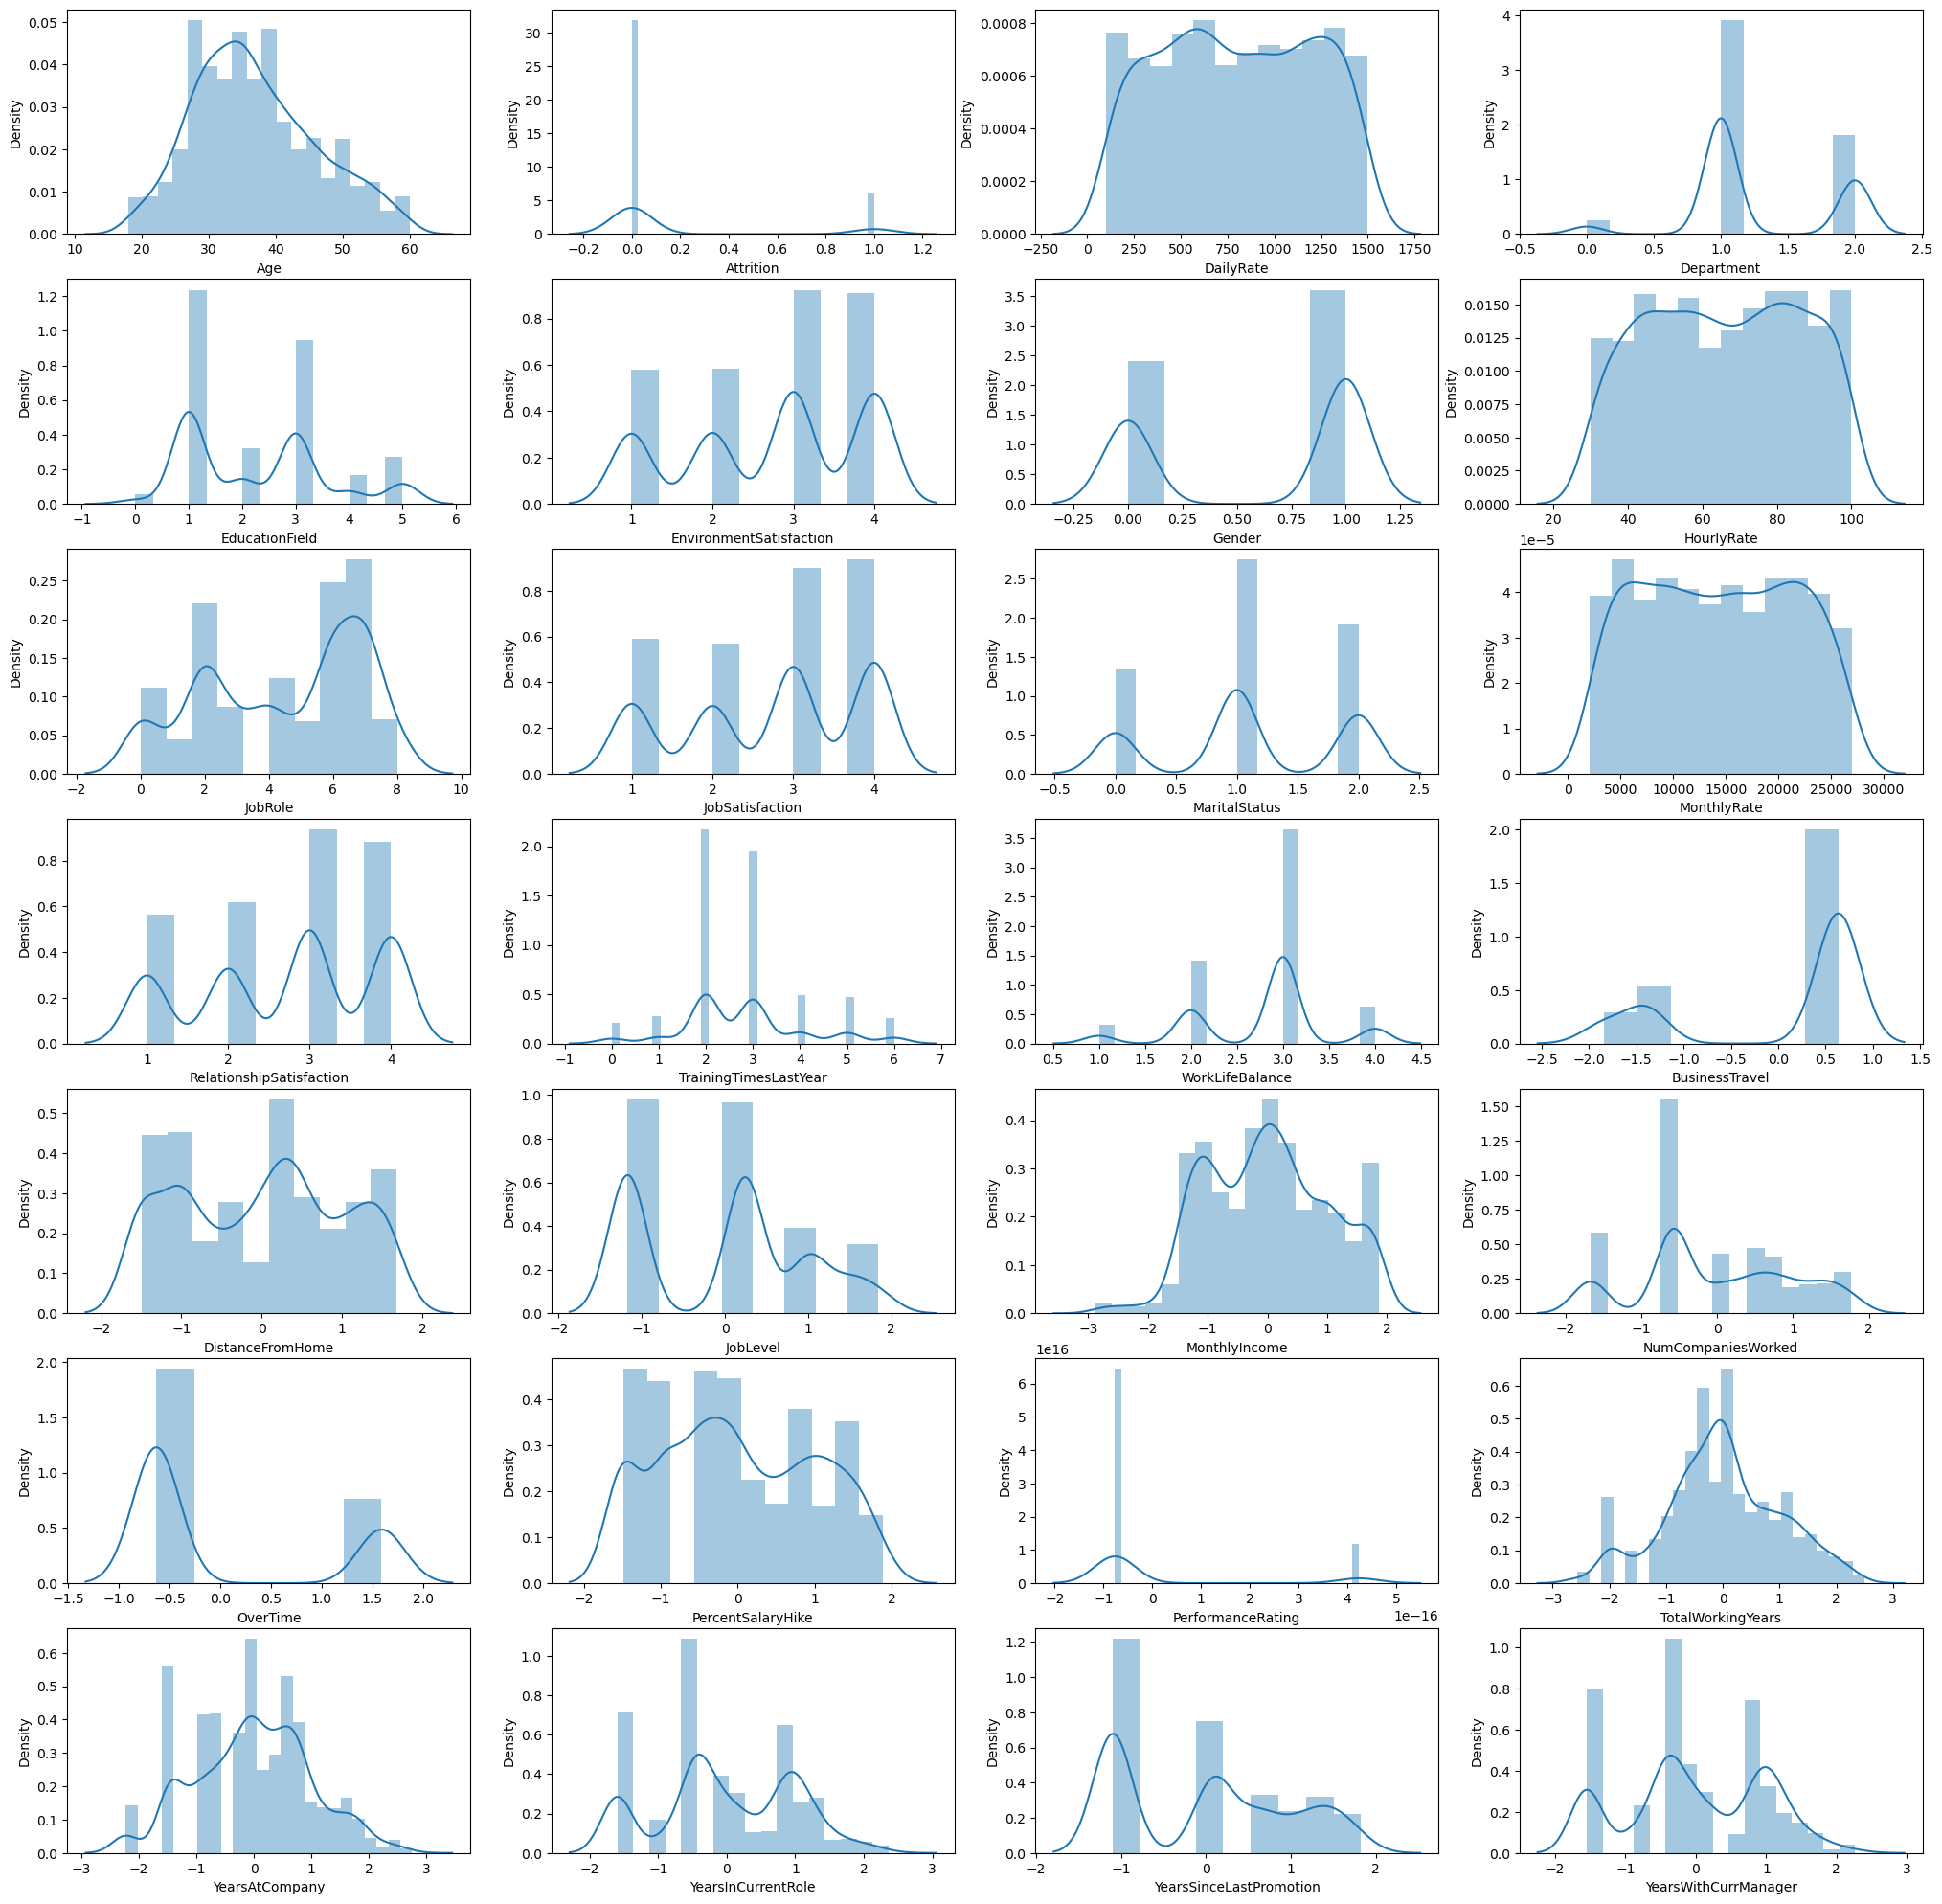

In [197]:
#Skewness is removed in the dataset
plt.figure(figsize=(25,25))
p=1
for i in hr_df:
    if p<=28:
        plt.subplot(7,4,p)
        sns.distplot(hr_df[i])
    p=p+1
plt.show()

# check for the outliers in the dataset using boxplot

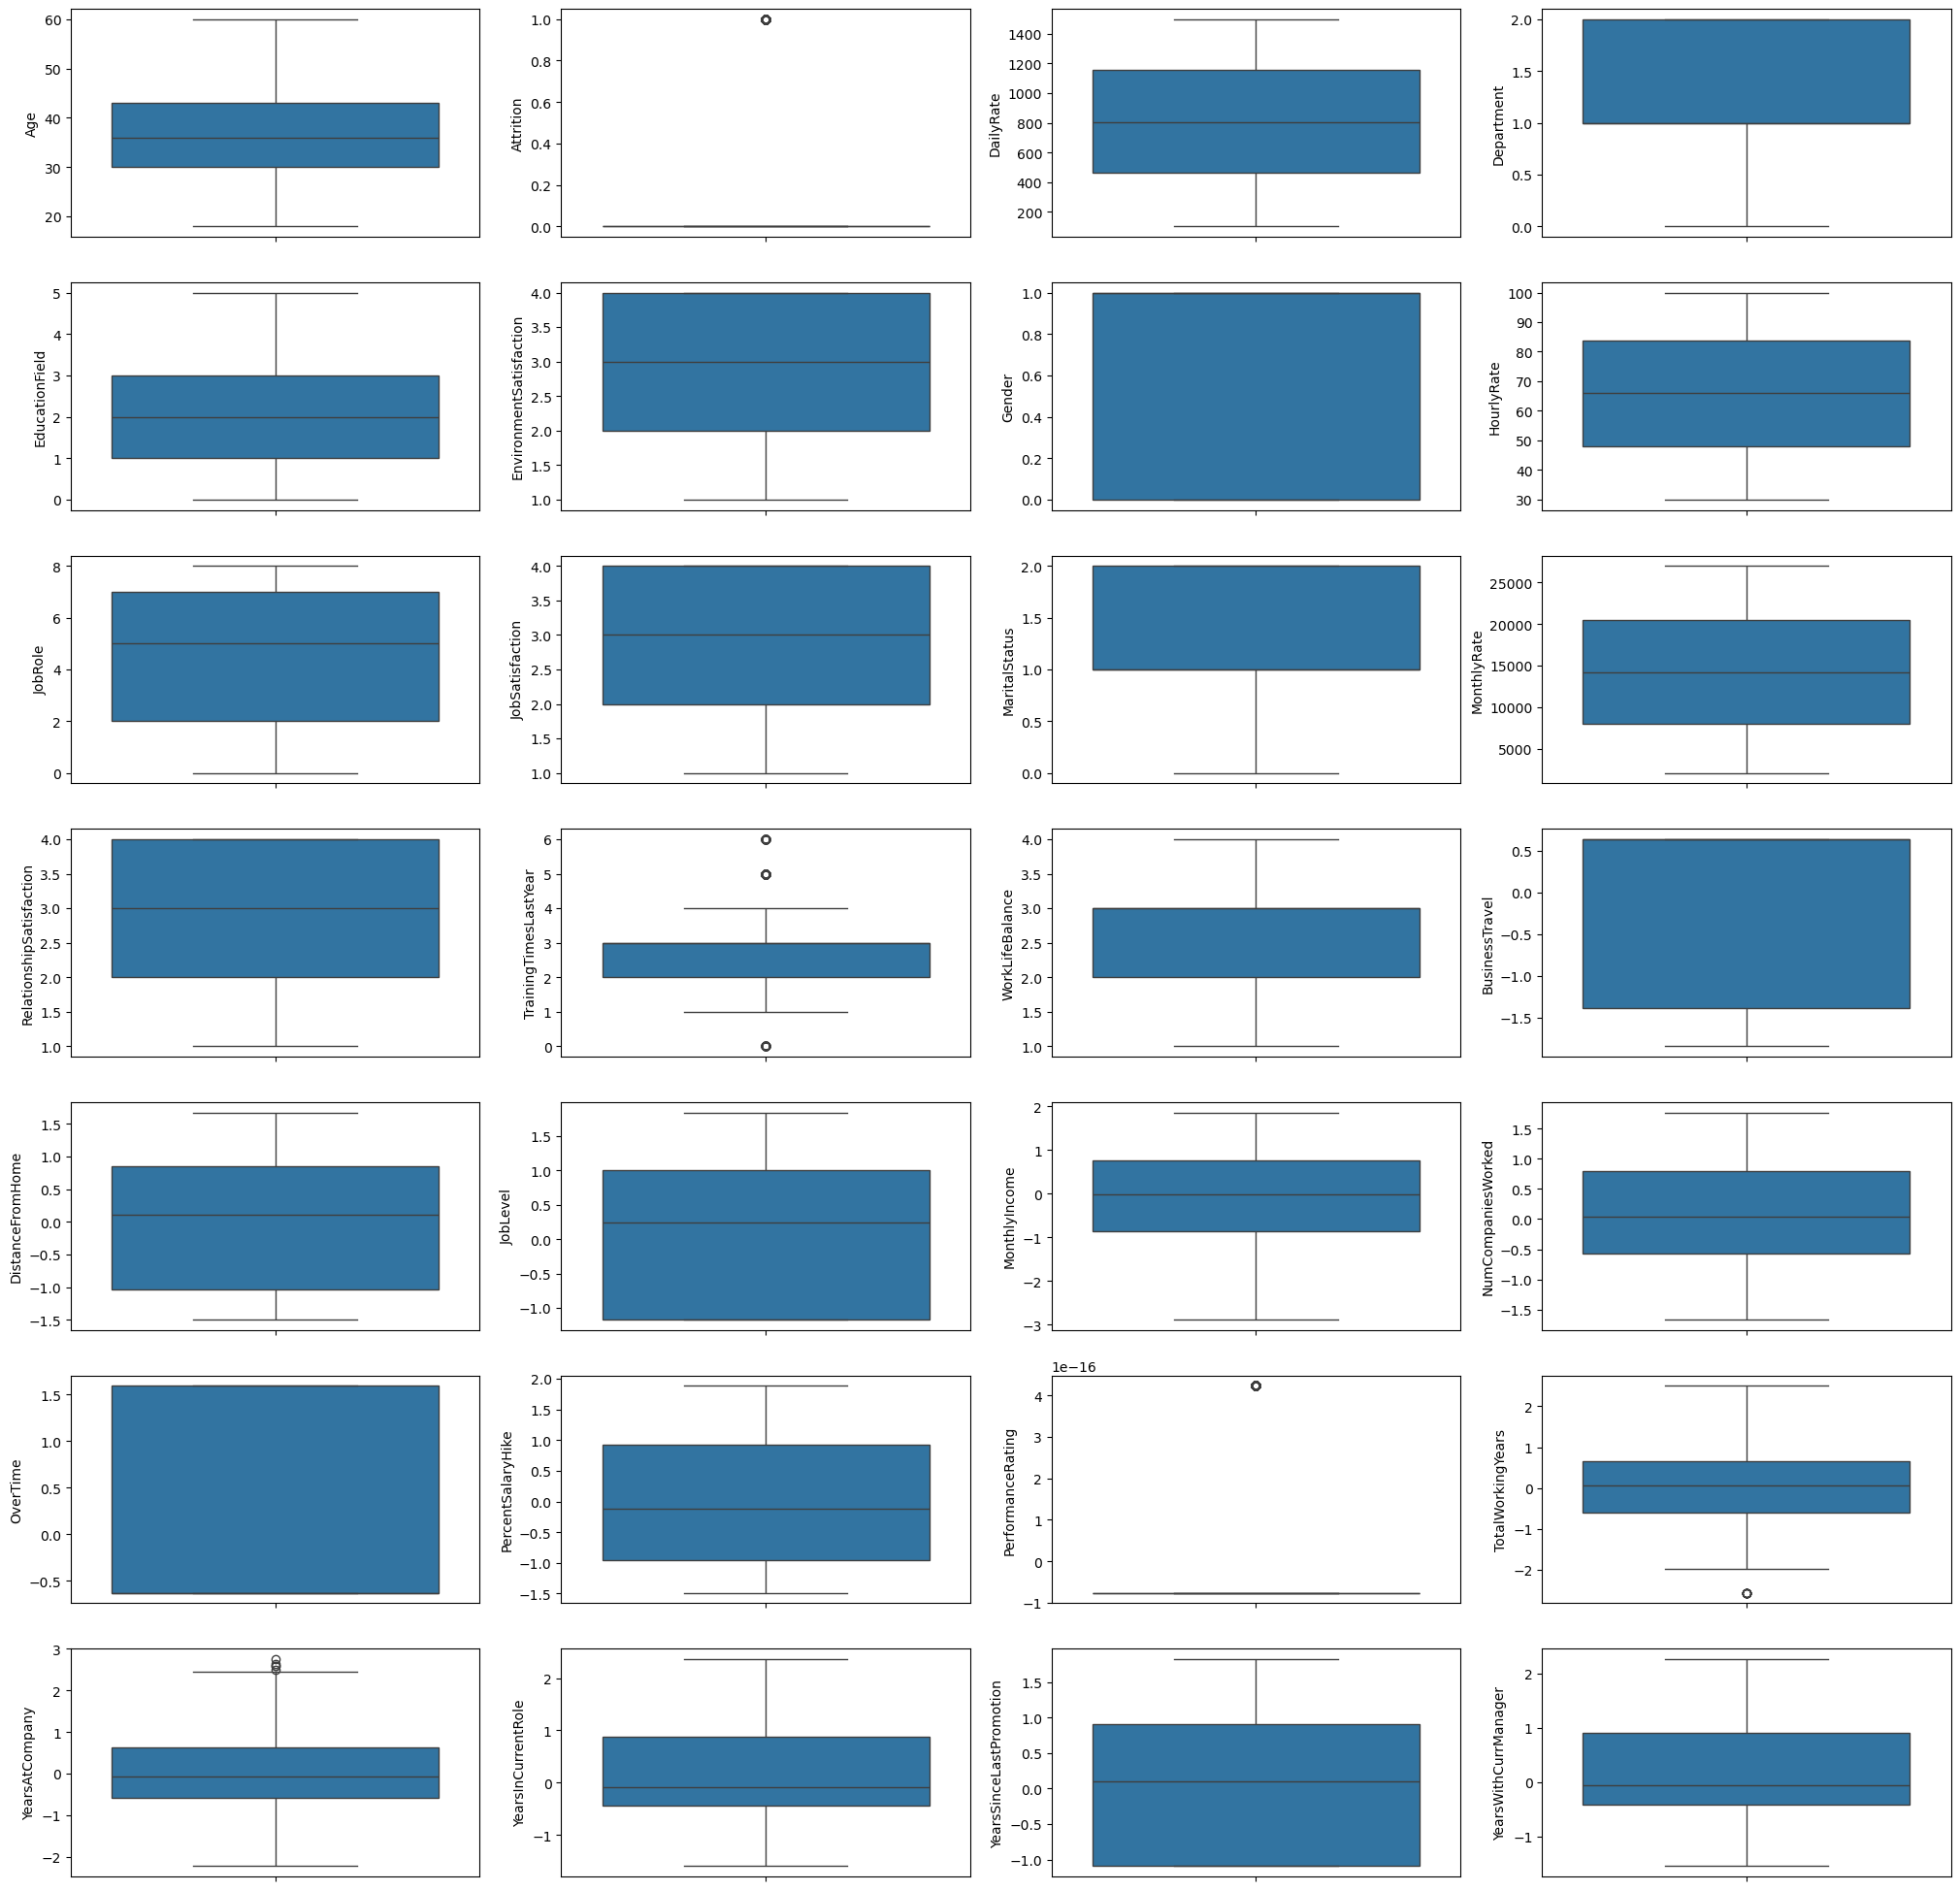

In [199]:
plt.figure(figsize=(25,25))
p=1
for i in hr_df:
    if p<=28:
        plt.subplot(7,4,p)
        sns.boxplot(hr_df[i])
    p=p+1
plt.show()

In [202]:
z=np.abs(zscore(hr_df))

In [204]:
np.where(z>=3)

(array([], dtype=int64), array([], dtype=int64))

It is clear from the zscore value that there are no outliers present in the dataset

# Split the input data as x(input) and y(Label/output)

In [208]:
x=hr_df.drop(columns='Attrition',axis=1)
x.head()

,Age,DailyRate,Department,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobRole,JobSatisfaction,MaritalStatus,...,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,2,1,2,0,94,7,4,2,...,0.285965,1.621331,1.591746,-1.488918,-7.632783e-17,-0.244305,0.139692,0.205562,-1.094862,0.490147
1,49,279,1,1,3,1,61,6,2,1,...,0.052833,-0.571302,-0.628241,1.679689,4.232725e-16,0.052495,0.762660,0.883888,0.096854,0.909635
2,37,1373,1,4,4,1,92,2,3,2,...,-1.447625,1.271339,1.591746,0.201133,-7.632783e-17,-0.410500,-2.229592,-1.596434,-1.094862,-1.550156
3,33,1392,1,1,4,0,56,6,3,1,...,-0.863050,-0.571302,1.591746,-1.488918,-7.632783e-17,-0.244305,0.482432,0.883888,0.905592,-1.550156
4,27,591,1,3,1,1,40,2,2,1,...,-0.567909,1.766182,-0.628241,-0.948760,-7.632783e-17,-0.592063,-0.951540,-0.446645,0.607464,-0.406881


In [210]:
y=hr_df['Attrition']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

# Check for multicollinearity using variance inflation factor

In [213]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['columns']=x.columns
    vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [215]:
calc_vif(x)

,columns,vif
0,Age,24.286651
1,DailyRate,4.842269
2,Department,13.180281
3,EducationField,3.823313
4,EnvironmentSatisfaction,6.968818
5,Gender,2.489883
6,HourlyRate,10.421705
7,JobRole,8.183826
8,JobSatisfaction,6.777195
9,MaritalStatus,3.279375


In [217]:
y.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

The dataset is imbalanced. To balance the dataset SMOTE oversampling technique is used.

# Balance the dataset using SMOTE over sampling technique

In [221]:
smt=SMOTE()
x_sampled,y_sampled=smt.fit_resample(x,y)

In [223]:
y_sampled.value_counts()

Attrition
1    1233
0    1233
Name: count, dtype: int64

In [225]:
x_sampled.shape

(2466, 27)

In [227]:
y_sampled.shape

(2466,)

There are 27 features that can be reduced by using dimensionality reduction technique called FactorAnalysis for classification problem.

# Using FactorAnalysis for dimensional reduction in the dataset

In [231]:
fa=FactorAnalysis(n_components=15)
hrdf_col=fa.fit_transform(x_sampled)
hr_dftrans=pd.DataFrame(hrdf_col)

In [233]:
hr_dftrans.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.696393,0.881809,-1.493779,0.505850,-0.097610,0.002046,-1.302813,-0.795300,-1.232670,-0.234034,-0.355812,1.009606,-0.540655,-0.032204,0.297624
1,-1.467823,-1.180971,0.175804,1.441469,0.259402,-1.269105,-0.629691,0.949496,-0.486421,-0.280512,0.051567,-0.447338,0.456463,-0.444635,0.183681
2,1.730086,1.397715,-1.372240,-0.428206,2.049223,0.359129,0.665775,-0.391318,1.448475,0.463745,-0.473120,-0.009592,-0.163795,-0.429025,0.275372
3,-1.218897,1.668067,0.599864,-0.339402,-0.165965,-1.495990,-0.514775,-0.128689,-0.330905,-0.455405,-0.173566,-0.840883,-0.296444,1.310298,0.012494
4,-0.292330,-0.465545,1.365417,-0.886002,0.169096,-0.033555,0.961724,-1.239563,1.185615,-0.542674,-1.008501,-0.141284,-0.542738,-0.192396,0.100538


In [235]:
hr_dftrans.shape

(2466, 15)

# Apply standardScaler to standardize the input data

In [238]:
sc=StandardScaler()
x_scales=sc.fit_transform(hr_dftrans)
x_scaled=pd.DataFrame(x_scales,columns=hr_dftrans.columns)
x_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.696393,0.881812,-1.495948,0.508524,-0.099757,0.002153,-1.410631,-1.082508,-1.877048,-0.415990,-0.670447,1.988974,-1.260387,-0.078295,0.769366
1,-1.467823,-1.180974,0.176059,1.449088,0.265108,-1.335437,-0.681803,1.292389,-0.740698,-0.498604,0.097165,-0.881278,1.064115,-1.081014,0.474820
2,1.730086,1.397720,-1.374233,-0.430470,2.094303,0.377900,0.720872,-0.532636,2.205665,0.824298,-0.891486,-0.018896,-0.381842,-1.043062,0.711844
3,-1.218897,1.668072,0.600735,-0.341196,-0.169616,-1.574180,-0.557377,-0.175163,-0.503885,-0.809474,-0.327046,-1.656580,-0.691075,3.185649,0.032297
4,-0.292330,-0.465546,1.367399,-0.890685,0.172816,-0.035309,1.041314,-1.687210,1.805395,-0.964592,-1.900289,-0.278337,-1.265242,-0.467760,0.259892


# Instantiate the models for building and training the model parameters

In [241]:
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
svc=SVC()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
bag=BaggingClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()
extra=ExtraTreesClassifier()


model_names=[(lr,"Logistic Regression"),
             (dtc,"DecisionTreeClassifier"),
             (svc,"SVC"),
             (knn,"KNeighborsClassifier"),
             (rfc,"RandomForestClassifier"),
             (bag,"BaggingClassifier"),
             (gbc,"GradientBoostingClassifier"),
             (ada,"AdaBoostClassifier"),
             (extra,"ExtraTreesClassifier")]

# Apply cross validation technique for each model to get best performing model

In [244]:
models=[lr,dtc,svc,knn,rfc,bag,gbc,ada,extra]

for i in models:
    cvs=cross_val_score(i,x_scaled,y_sampled,scoring='accuracy',cv=5,n_jobs=-1)
    print("Cross validation score for",i,"is",cvs,"\n mean of the cross validation is",np.mean(cvs))

Cross validation score for LogisticRegression() is [0.6417004  0.78701826 0.79107505 0.82150101 0.82555781] 
 mean of the cross validation is 0.7733705069351489
Cross validation score for DecisionTreeClassifier() is [0.62145749 0.78296146 0.75659229 0.77484787 0.76876268] 
 mean of the cross validation is 0.7409243580162765
Cross validation score for SVC() is [0.69433198 0.89046653 0.87221095 0.89249493 0.90872211] 
 mean of the cross validation is 0.851645301426448
Cross validation score for KNeighborsClassifier() is [0.78947368 0.82352941 0.80730223 0.78904665 0.8336714 ] 
 mean of the cross validation is 0.8086046759901782
Cross validation score for RandomForestClassifier() is [0.71052632 0.89046653 0.89655172 0.90060852 0.92292089] 
 mean of the cross validation is 0.8642147966264545
Cross validation score for BaggingClassifier() is [0.67004049 0.84989858 0.84381339 0.85395538 0.87626775] 
 mean of the cross validation is 0.81879511542157
Cross validation score for GradientBoosting

# Get the best random state and Maximum accuracy for best performed model

In [176]:
maxacc=0
maxrs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_sampled,test_size=0.30,random_state=i)
    extra.fit(x_train,y_train)
    y_pred=extra.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print("Accuracy score is",maxacc,"and random state is",maxrs)

Accuracy score is 0.9297297297297298 and random state is 68


In [246]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_sampled,test_size=0.30,random_state=68)

In [248]:
x_train.shape

(1726, 15)

In [250]:
x_test.shape

(740, 15)

In [252]:
y_train.shape

(1726,)

In [254]:
y_test.shape

(740,)

# Build and train the classification models

In [257]:
model_metrics=[]

for model_data,model_name in model_names:
    model_data.fit(x_train,y_train)
    y_pred=model_data.predict(x_test)
    y_pred_train=model_data.predict(x_train)
    r2=r2_score(y_test,y_pred)
    acc_train=accuracy_score(y_train,y_pred_train)
    acc_test=accuracy_score(y_test,y_pred)
    prec_test=precision_score(y_test,y_pred)
    recall_test=recall_score(y_test,y_pred)
    model_perf={"Model name":model_name,"R-Score(Test Data)":r2,"Accuracy Score(Training Data)":acc_train,"Accuracy Score(Test Data)":acc_test,"Precision Score(Test Data)":prec_test,"Recall Score(Test Data)":recall_test}
    model_metrics.append(model_perf)
model_df=pd.DataFrame(model_metrics)
model_df=model_df.sort_values(by='Accuracy Score(Test Data)',ascending=False)
model_df

,Model name,R-Score(Test Data),Accuracy Score(Training Data),Accuracy Score(Test Data),Precision Score(Test Data),Recall Score(Test Data)
8,ExtraTreesClassifier,0.653690,1.000000,0.913514,0.897297,0.927374
2,SVC,0.518412,0.921784,0.879730,0.854881,0.905028
4,RandomForestClassifier,0.518412,1.000000,0.879730,0.862534,0.893855
5,BaggingClassifier,0.388546,0.993627,0.847297,0.843137,0.840782
6,GradientBoostingClassifier,0.372313,0.921205,0.843243,0.821809,0.863128
0,Logistic Regression,0.188335,0.777520,0.797297,0.787293,0.796089
3,KNeighborsClassifier,0.150458,0.863847,0.787838,0.703854,0.969274
7,AdaBoostClassifier,0.107169,0.816338,0.777027,0.764384,0.779330
1,DecisionTreeClassifier,-0.055164,1.000000,0.736486,0.715040,0.756983


In [276]:
extra.fit(x_train,y_train)
y_pred=extra.predict(x_test)
y_pred_train=extra.predict(x_train)
print("R-Score",r2_score(y_test,y_pred))
print("Accuracy Score for train data",accuracy_score(y_train,y_pred_train))
print("Accuracy Score for test data",accuracy_score(y_test,y_pred))
print("Precision Score",precision_score(y_test,y_pred))
print("Recall Score",recall_score(y_test,y_pred))

R-Score 0.6536897832636228
Accuracy Score for train data 1.0
Accuracy Score for test data 0.9135135135135135
Precision Score 0.9060773480662984
Recall Score 0.9162011173184358


# Hyperparameter tuning for ExtraTreesClassifier

In [260]:
param_grids={"criterion" : ["gini", "entropy", "log_loss"], "max_features" : ["sqrt", "log2", None],"bootstrap":[True,False],"oob_score":[True,False],"class_weight" : ["balanced", "balanced_subsample"]}

In [262]:
param_grids

{'criterion': ['gini', 'entropy', 'log_loss'],
 'max_features': ['sqrt', 'log2', None],
 'bootstrap': [True, False],
 'oob_score': [True, False],
 'class_weight': ['balanced', 'balanced_subsample']}

In [264]:
gscv=GridSearchCV(extra,param_grids,cv=5,scoring='accuracy',n_jobs=-1)

In [266]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'oob_score': [True, False]},
             scoring='accuracy')

In [268]:
gscv.best_params_

{'bootstrap': False,
 'class_weight': 'balanced_subsample',
 'criterion': 'log_loss',
 'max_features': 'log2',
 'oob_score': False}

In [270]:
extra1=ExtraTreesClassifier(criterion='log_loss',max_features='log2',bootstrap=False,oob_score=False,class_weight='balanced_subsample')
extra1.fit(x_train,y_train)
y_predextra=extra1.predict(x_test)
y_predextra

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,

In [272]:
print("R-Score",r2_score(y_test,y_predextra))
print("Accuracy Score",accuracy_score(y_test,y_predextra))
print("Precision Score",precision_score(y_test,y_predextra))
print("Recall Score",recall_score(y_test,y_predextra))

R-Score 0.6320453947175992
Accuracy Score 0.9081081081081082
Precision Score 0.8940217391304348
Recall Score 0.9189944134078212


In [274]:
y_predict=extra.predict_proba(x_test)[:,1]
y_predict

array([0.36, 0.19, 0.92, 0.34, 0.44, 0.41, 0.23, 0.29, 0.61, 0.9 , 0.3 ,
       0.31, 0.58, 0.85, 0.72, 0.25, 0.56, 0.59, 0.26, 0.47, 0.23, 0.77,
       0.41, 0.9 , 0.65, 0.38, 0.69, 0.28, 0.3 , 0.85, 0.34, 0.28, 0.96,
       0.5 , 0.69, 0.8 , 0.32, 0.62, 0.73, 0.72, 0.76, 0.71, 0.79, 0.45,
       0.23, 0.41, 0.6 , 0.65, 0.87, 0.58, 0.8 , 0.61, 0.82, 0.21, 0.17,
       0.56, 0.9 , 0.57, 0.85, 0.42, 0.22, 0.75, 0.09, 0.63, 0.15, 0.98,
       0.95, 0.26, 0.94, 0.57, 0.76, 0.38, 0.34, 0.86, 0.91, 0.82, 0.17,
       0.54, 0.15, 0.88, 0.18, 0.77, 0.89, 0.15, 0.27, 0.3 , 0.14, 0.17,
       0.29, 0.15, 0.66, 0.34, 0.83, 0.2 , 0.81, 0.62, 0.89, 0.18, 0.38,
       0.35, 0.48, 0.38, 0.65, 0.08, 0.74, 0.7 , 0.47, 0.23, 0.3 , 0.16,
       0.4 , 0.92, 0.2 , 0.7 , 0.34, 0.48, 0.92, 0.78, 0.43, 0.79, 0.2 ,
       0.42, 0.25, 0.73, 0.42, 0.6 , 0.25, 0.62, 0.33, 0.45, 0.69, 0.92,
       0.18, 0.45, 0.17, 0.29, 0.84, 0.7 , 0.84, 0.23, 0.47, 0.94, 0.84,
       0.37, 0.73, 0.19, 0.5 , 0.69, 0.73, 0.33, 0.

In [278]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [280]:
fpr

array([0.        , 0.08900524, 1.        ])

In [282]:
tpr

array([0.        , 0.91620112, 1.        ])

In [284]:
threshold

array([inf,  1.,  0.])

# ROC curve for the performance metrics of the model

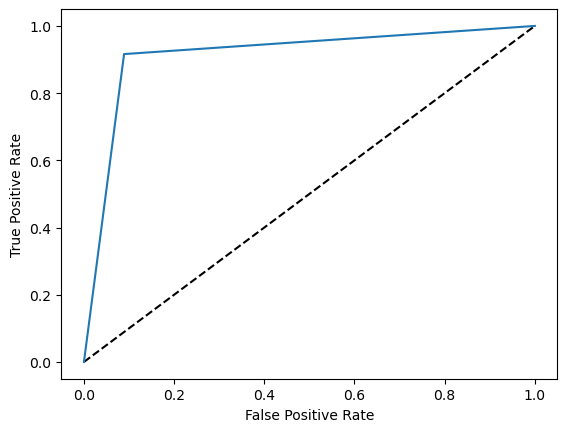

In [286]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="ExtraTreesClassifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [288]:
auc_score=roc_auc_score(y_test,y_pred)
auc_score

0.9135979408581708

# Saving the best model

In [290]:
import joblib as jb

jb.dump(extra,open("HRAnalytics.pkl","wb"))

# Load the saved model

In [293]:
import joblib as jb

model=jb.load(open("HRAnalytics.pkl","rb"))
model.predict(x_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,

# Test the data

In [295]:
a=np.array(y_test)
df=pd.DataFrame()
df["Actual Output"]=a
df["Predicted Output"]=y_pred
df

,Actual Output,Predicted Output
0,0,0
1,0,0
2,1,1
3,0,0
4,1,0
...,...,...
735,1,1
736,0,0
737,0,0
738,1,1


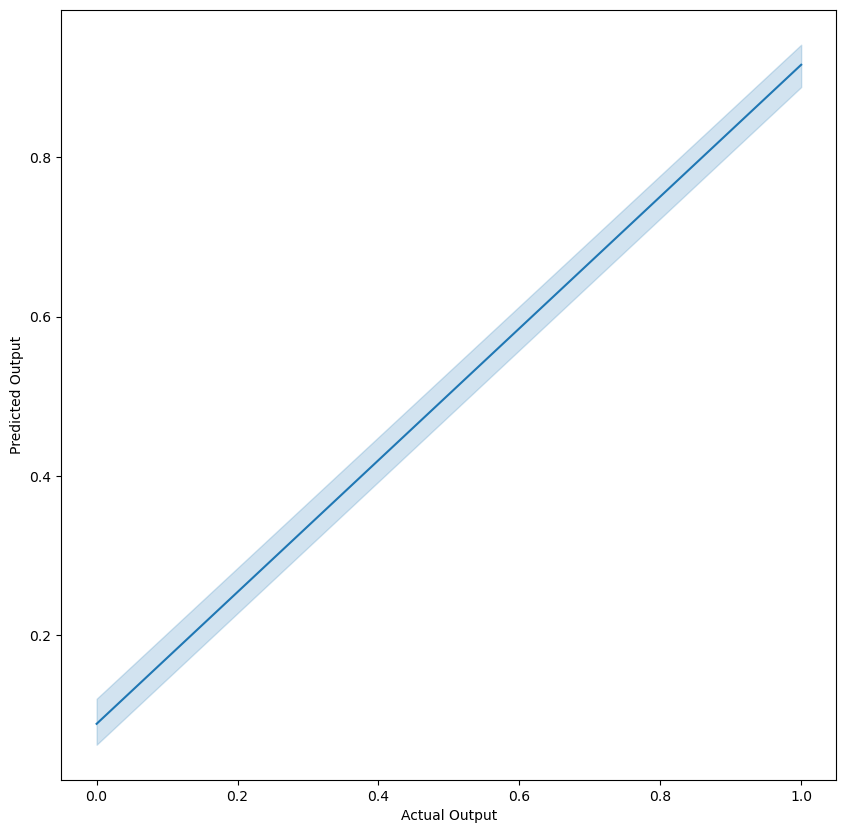

In [303]:
plt.figure(figsize=(10,10))
sns.lineplot(df,x=a,y=y_pred)
plt.xlabel("Actual Output")
plt.ylabel("Predicted Output")
plt.show()

The above plot shows that when the actual output increases then the predicted output value also increase this shows the ExtraTreesClassifier model perform better when compared to other model.